## Preprocessing and dataset exploration

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Set up directories

In [2]:
# data_dir="/Users/michellehu/git_dirs/ComplexSystems_AMATH563/data/"
wd="/mnt/Backups/jmhu"

data_dir=wd+"/git_dirs/ComplexSystems_AMATH563/hw2/data/"
model_dir=wd+"/git_dirs/ComplexSystems_AMATH563/hw2/models/"
fig_dir = wd+"/git_dirs/ComplexSystems_AMATH563/hw2/figures/"
    
if not os.path.exists(data_dir):
    !mkdir $data_dir

if not os.path.exists(model_dir):
    !mkdir $model_dir

if not os.path.exists(fig_dir):
    !mkdir $fig_dir

### Load data

In [3]:
# Courtesy of Friedrich's image conversion find
ds = '1845 20 32 1847 20 50 1849 52 12 1851 83 10 1853 64 13 1855 68 36 1857 83 15 1859 12 12 1861 36 6 1863 150 6 1865 110 65 1867 60 70 1869 7 40 1871 10 9 1873 70 20 1875 100 34 1877 92 45 1879 70 40 1881 10 15 1883 11 15 1885 137 60 1887 137 80 1889 18 26 1891 22 18 1893 52 37 1895 83 50 1897 18 35 1899 10 12 1901 9 12 1903 65 25'.split()

### Reshape into dataframe

In [4]:
# Extract columns, coerce to int numpy arrays
years=np.array(ds[::3], dtype='uint16')
hare=np.array(ds[1::3], dtype='uint16')
lynx=np.array(ds[2::3], dtype='uint16')

# Convert to dataframe

columns=["Year", "Hare", "Lynx"]

df = pd.DataFrame(data=np.array([years, hare, lynx]).transpose(), 
                  columns=columns
                 )
df.head()

,Year,Hare,Lynx
0,1845,20,32
1,1847,20,50
2,1849,52,12
3,1851,83,10
4,1853,64,13


### Add raw number dataframe (thousands of pelts) for completeness

In [5]:
# Convert to dataframe
df_raw = pd.DataFrame(data=np.array([years, hare*1000, lynx*1000]).transpose(), 
                  columns=["Year", "Hare", "Lynx"]
                 )
df_raw.head()

,Year,Hare,Lynx
0,1845,20000,32000
1,1847,20000,50000
2,1849,52000,12000
3,1851,17464,10000
4,1853,64000,13000


### Check shapes, sizes and visualize

Dataframe shape (rows, cols): (30, 3)


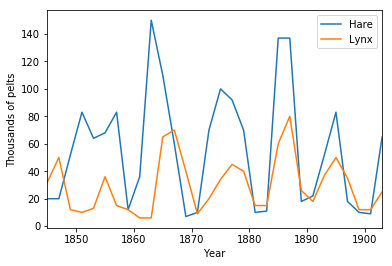

In [6]:
df.plot(x="Year");
plt.ylabel("Thousands of pelts")
print("Dataframe shape (rows, cols):", df.shape)

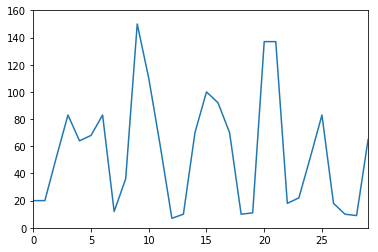

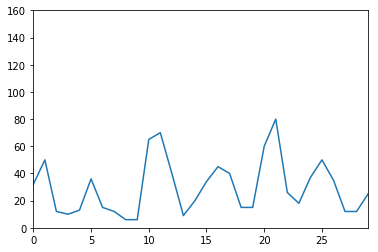

In [7]:
df.Hare.plot(x=df.Year, ylim=(0,160))
plt.figure()
df.Lynx.plot(x=df.Year, ylim=(0,160))

### Save data for later

In [8]:
df.to_csv(data_dir+"population_data.csv", 
          columns=columns,
          index=False,
         )

In [9]:
# Check it out
df_fromdisk = pd.read_csv(data_dir+"population_data.csv",  
                         )
df_fromdisk.head()

,Year,Hare,Lynx
0,1845,20,32
1,1847,20,50
2,1849,52,12
3,1851,83,10
4,1853,64,13
